# Практическая часть мастер класса по ML интервью

## Задача 1
Опишите задачу линейной регрессии и расскажите об условиях к данным для её применения

### Ответ




#### Постановка задачи
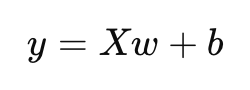


#### Лосс функция

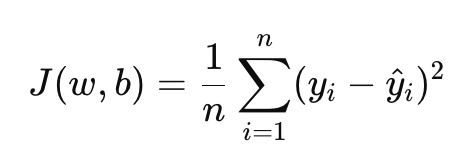

#### Методы оптимизации:
Градиентный спуск либо формульное решение
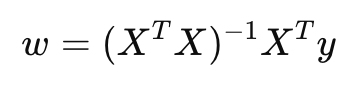


Условия для применения линейной регрессии:

*   Линейное соотношение между независимыми и зависимыми переменными
*   Независимые остатки и их постоянство
*   Нормально распределённые остатки: Q-Q график, boxplot, Shapiro–Wilk тест
*   Слабая мультиколлинеарность

## Задача 2

Реализуйте алгоритм поиска ближайшего соседа и протестируйте на простом примере.

### Этап 1: вопросы к интервьюеру

### Этап 2: реализация решения

In [ ]:
from collections import Counter
import numpy as np

class KNN:
    def __init__(self, k=5):
      self.k = k

    def fit(self, X_train, y_train):
      self.X_train = X_train
      self.y_train = y_train

    def predict(self, X_test):
      y_pred = []
      for x in X_test:
        dists = np.linalg.norm(self.X_train - x, axis=1)
        nearest_indices = np.argsort(dists)[:self.k]
        nearest_labels = self.y_train[nearest_indices]
        label = Counter(nearest_labels).most_common(1)[0][0]
        y_pred.append(label)
      return np.array(y_pred)

### Ответ

In [ ]:
from collections import Counter
import numpy as np

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Считаем дистанцию от тестового примера до всех примеров в обучающей выборке
            # Используем евклидову метрику для простоты (можно манхэттенскую метрику)
            distances = np.linalg.norm(self.X_train - x, axis=1)

            # Выбираем k ближайших соседей
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]

            # Выбираем наиболее часто встречающуюся метку
            label = Counter(nearest_labels).most_common(1)[0][0]
            y_pred.append(label)

        return np.array(y_pred)

### Этап 3: тест решения



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [ ]:
knn = KNN(k=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


### Этап 4: анализ и комментарии

## Задача 3

Для чего нужно масштабирование данных в машинном обучении? Приведите примеры, где это необходимо и избыточно.




### Когда нормализация нужна

*   Разный масштаб фичей
*   Более быстрая сходимость алгоритмов, основанных на градиентном спуске
*   Нестабильные вычисления при больших значениях
*   Более эффективное использование регуляризации признаков

Min-max: (x - min(x)) / (max(x) - min(x))

Standartization: (x - mean(x)) / std(x)

### Когда нормализация НЕ нужна

*   Алгоритмы, основанные на деревьях
*   Признаки уже приведены к одному масштабу
*   Вероятностные алгоритмы

## Задача 4

Вы работаете в онлайн-магазине, ваша задача предсказать следующие возможные покупки для данного пользователя

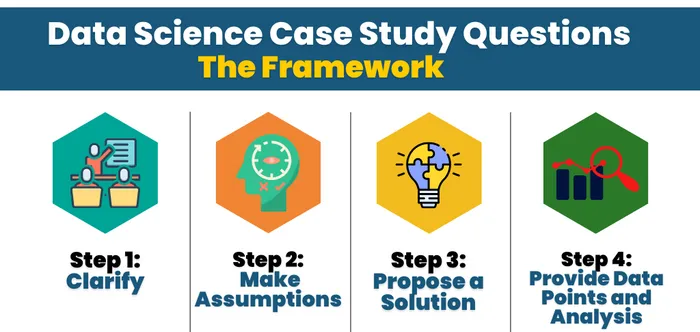

## Ключевые этапы решения

### Уточняющие вопросы


1.   Бизнес цели: в чём смысл предсказания? Увеличение конверсии, оптимизация
2.   Тип предсказания: мы должны предсказать следующий товар/категорию/корзину?
3.   Временная шкала: предсказываем возможную следующую покупку сегодня, в течение недели, в течение месяца?
4.   Персонализация: необходимо ли адаптировать модель под каждого пользователя, достаточно ли общего подхода?
5.   Проблема холодного старта
6.   Доступные данные для работы
7.   Скорость предсказания (latency)

### Высокоуровневая архитектура/подход к решению


1. Сбор данных

  *   Транзакии пользователя (продукт, цена, момент времени)
  *   История поиска (клики, потраченное время, просмотренные товары)
  *   Методанные пользователя (персональные данные, предпочтения)
  *   Внешние сигналы (сезонность, промоакции, тренды)

2. Обработка данных

  *   Аггрегация пользовательских признаков (последние покупки, частота покупок)
  *   Временн**ы**е признаки (недельные/месячные/годичные тренды)
  *   Кодирование категориальных фичей (эмбеддинги продуктов)
  *   Разбиение данных на трейн/тест

3. Выбор ML модели
  *   Классические модели: логистическая регрессия, градиентный бустинг матричное разложение
  *   Методы глубокого обучения: LSTM, трансформеры, нейронная коллаборативная фильтрация, two tower models
  *   Обучение с подкреплением

4. Методы вычислений для постоянных обновлений
  *   Real-time вычисления
  *   Оценка точности и мониторинг

5. Offline метрики (Precision@K, Recall@K, MAP)
  *   A/B тестирование
  *   Model drift; data drift; обновление фичей


### Более детальный взгляд на модели (плюсы и минусы каждого подхода)


1. Collaborative Filtering

  *   ✅ Хорошо работает для существующих пользователей
  *   ❌ Сложности для cold start пользователей/товаров

2. Time-Series-based модели

  *   Рекуррентные нейросети (LSTM, GRUs)
     *   Подхватывают зависимости в последовательностях покупок
  *   Transformers (BERT4Rec, SASRec)
     *   Self-attention-based модели для более разнесённых во времени зависимостей
  *   ✅ Хорошо работает для предсказания последовательности покупок
  *   ❌ Много ресурсов для вычислений

3. Гибридные подходы


### Проблема холодного старта


1.   Использование фичей пользователя, продуктов
2.   Добавление демографических данных
3.   Рекомендация наиболее популярных товаров общей (неперсонализированной моделью)

### Масштабирование



1.   Feature Store: эффективное хранение и использование признаков пользователей и товаров
2.   Model Caching: хранение наиболее часто используемых признаков в кэше
3.   Sharding (шардирование): распределение данных пользователей/товаров между разными серверами



### Мониторинг и Feedback loop

1. Трекинг метрик удовлетворённости пользователей (CTR, конверсия, средний чек)
2. Как "бороться" (если это необходимо) с feedback loop